In [23]:
import pandas as pd

raw_path = r"f:/@courseworks/PhysicsExperiments/ThermalResistor/processed_data.csv"

# Read all rows as lists, handling inconsistent columns
with open(raw_path, encoding='utf-8') as f:
    lines = [line.strip() for line in f if line.strip()]

rows = [line.split(',') for line in lines]

# Find the maximum number of columns
max_cols = max(len(row) for row in rows)

# Pad rows so all have the same length
for row in rows:
    row += [''] * (max_cols - len(row))

# Extract variable names and their data
data_dict = {}
for row in rows:
    key = row[0]
    values = row[1:]
    data_dict[key] = values

# Convert to DataFrame (transpose so each variable is a column)
df = pd.DataFrame(data_dict)
df

,t/℃,T/K,1/T (10^-2 K^-1),R_T/Ω,ln R_T,-w/(%·K^-1),N
0,35,308.0,0.32468,1831,7.51262,-18.31,0.0
1,40,313.0,0.31949,1421,7.25912,-14.21,12.0
2,45,318.0,0.31447,1241,7.12367,-12.41,19.5
3,50,323.0,0.3096,1072,6.97728,-10.72,28.4
4,55,328.0,0.30488,910.9,6.81443,-9.109,40.0
5,60,333.0,0.3003,750.9,6.62127,-7.509,55.9
6,65,338.0,0.29586,640.0,6.46147,-6.4,67.0
7,70,343.0,0.29155,549.0,6.3081,-5.49,79.0
8,75,348.0,0.28736,473.2,6.15952,-4.732,91.0
9,80,353.0,0.28329,411.3,6.01932,-4.113,100.0


# Plotting 1/T vs lnR_T
This cell demonstrates how to plot the variation of $1/T$ with $\ln R_T$ using matplotlib.

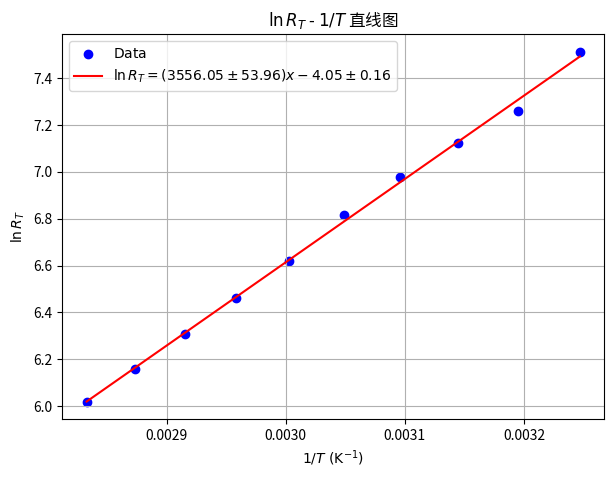

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Set font to support Chinese characters
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans SC', 'STSong', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Extract and clean 1/T (K^-1) and lnR_T columns (skip empty/invalid values)
x = df['1/T (10^-2 K^-1)']
y = df['ln R_T']

# Convert to numeric, coerce errors to NaN, then drop NaNs
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
mask = (~x.isna()) & (~y.isna())
x = x[mask] * 1e-2  # Convert to K^-1
y = y[mask]

# Define linear function model
def linear_func(x, k, b):
    return k * x + b

# Fit data using scipy's curve_fit
popt, pcov = curve_fit(linear_func, x, y)
k, b = popt
perr = np.sqrt(np.diag(pcov))  # Standard errors of the parameters
k_err, b_err = perr

# Generate fitted line
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_func(x_fit, k, b)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='b', label=fr'$\mathrm{{Data}}$')
plt.plot(x_fit, y_fit, 'r-', 
         label=fr'$\ln R_T = ({k:.2f}\pm{k_err:.2f})x {b:+.2f}\pm{b_err:.2f}$')
plt.xlabel(r'$1/T\ (\mathrm{K}^{-1})$')
plt.ylabel(r'$\ln R_T$')
plt.title(r'$\ln R_T$ - $1/T$ 直线图')
plt.grid(True)
plt.legend()
plt.savefig('output/plot1_Kinv.png', dpi=300, bbox_inches='tight')
plt.show()

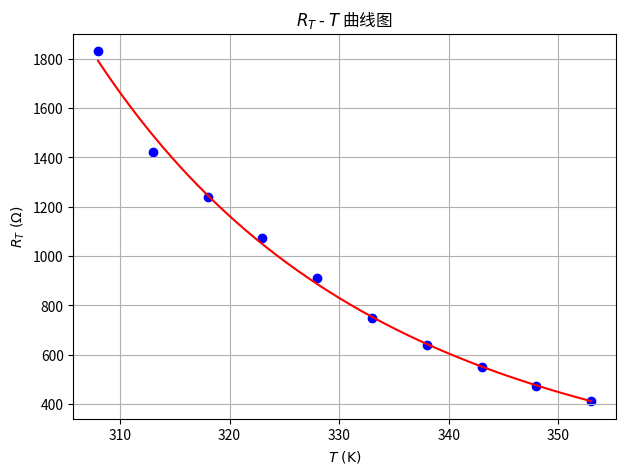

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 设置字体支持中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans SC', 'STSong', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 提取 T 和 R_T
df['T/K'] = pd.to_numeric(df['T/K'], errors='coerce')
df['R_T/Ω'] = pd.to_numeric(df['R_T/Ω'], errors='coerce')
df = df.dropna(subset=['T/K', 'R_T/Ω'])
T = df['T/K']
R_T = df['R_T/Ω']

# 定义拟合函数：指数函数形式 R_T = A * exp(B / T)
def exp_func(T, A, B):
    return A * np.exp(B / T)

# 曲线拟合
popt, pcov = curve_fit(exp_func, T, R_T)
A, B = popt
A_err, B_err = np.sqrt(np.diag(pcov))

# 生成拟合曲线
T_fit = np.linspace(T.min(), T.max(), 300)
R_fit = exp_func(T_fit, A, B)

# 作图
plt.figure(figsize=(7, 5))
plt.scatter(T, R_T, color='b')
plt.plot(
    T_fit, R_fit, 'r-'
)
plt.xlabel(r'$T\ (\mathrm{K})$')
plt.ylabel(r'$R_T\ (\Omega)$')
plt.title(r'$R_T$ - $T$ 曲线图')
plt.grid(True)
plt.savefig('output/plot2.png', dpi=300, bbox_inches='tight')
plt.show()


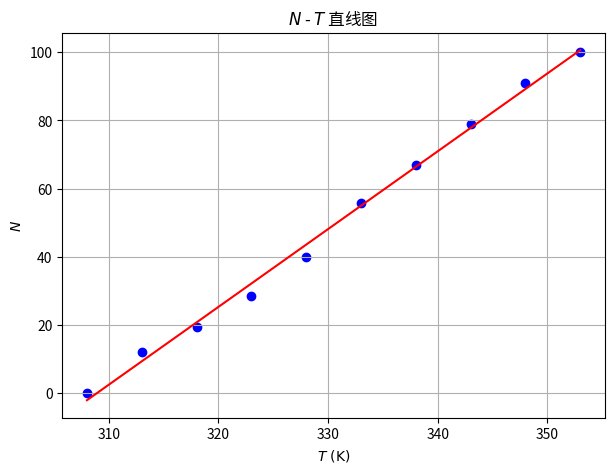

In [27]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Set font to support Chinese characters
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans SC', 'STSong', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Extract and clean T/K and N columns (skip empty/invalid values)
x = df['T/K']
y = df['N']

# Convert to numeric, coerce errors to NaN, then drop NaNs
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
mask = (~x.isna()) & (~y.isna())
x = x[mask]
y = y[mask]

# Define linear function model
def linear_func(x, k, b):
    return k * x + b

# Fit data using scipy's curve_fit
popt, pcov = curve_fit(linear_func, x, y)
k, b = popt
perr = np.sqrt(np.diag(pcov))  # Standard errors of the parameters
k_err, b_err = perr

# Generate fitted line
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_func(x_fit, k, b)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='b', label=r'$\mathrm{Data}$')
plt.plot(x_fit, y_fit, 'r-', 
         label=fr'$N = ({k:.2f}\pm{k_err:.2f})T/K {b:+.2f}\pm{b_err:.2f}$')
plt.xlabel(r'$T\ (\mathrm{K})$')
plt.ylabel(r'$N$')
plt.title(r'$N$ - $T$ 直线图')
plt.grid(True)
plt.savefig('output/plot_T_vs_N.png', dpi=300, bbox_inches='tight')
plt.show()